<a href="https://colab.research.google.com/github/PRAGYA-PRANSHU/MyFirstProject/blob/main/KNN_run_on_26_07_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from IPython.display import display
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
dataset = pd.read_csv('/content/DrDoS_LDAP_0.csv')
#Currently I will be dealling with numerical columns only.
colType = ['int64','float64']
#Select the columns which are either int64 or float64.
numCols=list(dataset.select_dtypes(include=colType).columns)
#Assigning numerical columns from df to data variable. We can use the same variable as well.
data=dataset[numCols]

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:78])
X[:, 0:78] = imputer.transform(X[:, 0:78])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 80, random_state = 0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 50)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9923364485981309, 0.9887850467289719, 0.9845794392523365, 0.9318691588785046, 0.9286915887850468, 0.9286915887850468, 0.9285981308411215, 0.9289719626168225, 0.9290654205607477, 0.925607476635514, 0.9766355140186916, 0.9239252336448598, 0.9239252336448598, 0.9230841121495327, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944, 0.927570093457944]


Text(0, 0.5, 'Testing Accuracy')

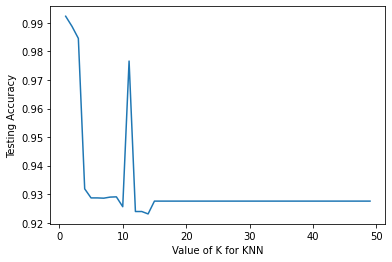

In [17]:


# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

